## Contour plots

In [252]:
N = 100
p = 0.5

delta.grid = matrix(NA, N, N+1)

for (i in 5:nrow(delta.grid)) {
    
    n = i
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    
    for (r in 0:n) {

        prob.norm = dnorm(r, mean = mu, sd = sigma)
        prob.binom = dbinom(r, n, p)
#         ev.norm = e(prob.norm)
#         ev.binom = e(prob.binom)
#         delta = ev.norm - ev.binom
        delta = prob.binom / prob.norm
        
        j = round(N * r / n)
        delta.grid[i, j+1] <- delta
    }
}

# fill in missing values
delta.grid.prev = delta.grid
delta.grid.next = delta.grid
delta.grid.prev.dist = delta.grid
delta.grid.next.dist = delta.grid
for (i in 1:nrow(delta.grid)) {
    prev.value = delta.grid.prev[i, 1]
    next.value = delta.grid.next[i, N+1]
    prev.dist = 0
    next.dist = 0
    for (j in 1:N) {
        if (is.na(delta.grid.prev[i, j])) {
            prev.dist = prev.dist + 1
            delta.grid.prev[i, j] = prev.value
            delta.grid.prev.dist[i, j] = prev.dist
        } else {
            prev.dist = 0
            prev.value = delta.grid.prev[i, j]
        }
        if (is.na(delta.grid.next[i, N+1-j])) {
            next.dist = next.dist + 1
            delta.grid.next[i, N+1-j] = next.value
            delta.grid.next.dist[i, N+1-j] = next.dist
        } else {
            next.dist = 0
            next.value = delta.grid.next[i, N+1-j]
        }
    }
}

# linear interpolation
delta.grid.correct = delta.grid
for (i in 1:nrow(delta.grid)) {
    for (j in 1:ncol(delta.grid)) {
        if (is.na(delta.grid.correct[i, j])) {
            prev.dist = delta.grid.prev.dist[i, j]
            next.dist = delta.grid.next.dist[i, j]
            prev.value = delta.grid.prev[i, j]
            next.value = delta.grid.next[i, j]
            lambda = prev.dist / (prev.dist + next.dist)
            delta.grid.correct[i, j] = (1 - lambda) * prev.value + lambda * next.value
#             print(delta.grid[i, j])
        }
    }
}

In [201]:
n = 100
p = 0.5
mu = n * p
sigma = sqrt(n * p * (1 - p))
r = 30
dbinom(r, n, p) / dnorm(r, mu, sigma)

[1] 0.8656748

In [257]:
sqrt(25)

[1] 5

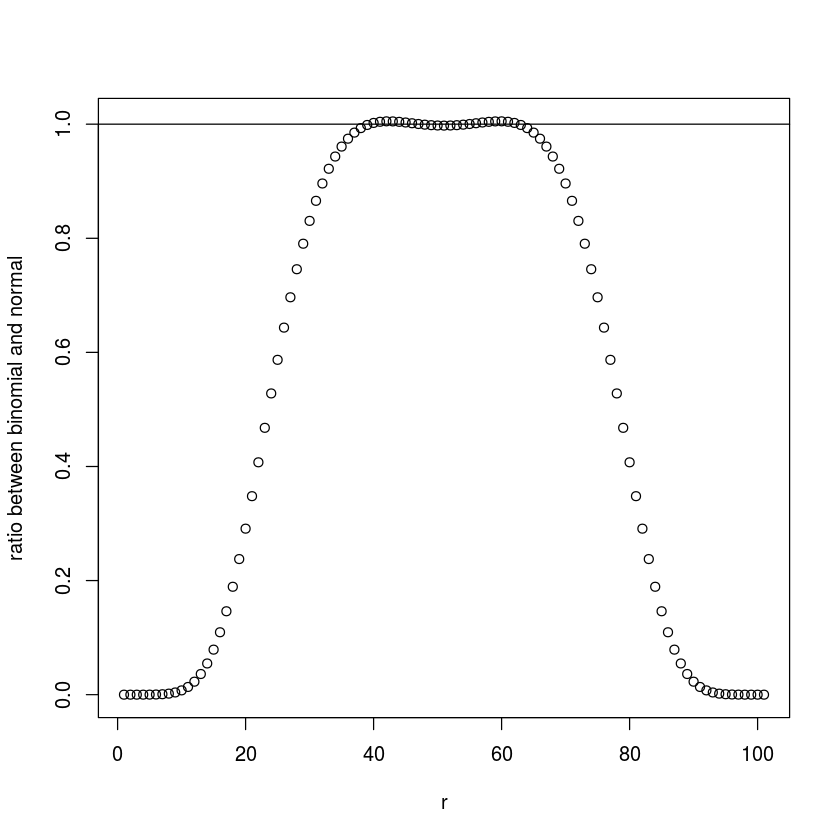

In [256]:
plot(delta.grid[100,], xlab = 'r', ylab = 'ratio between binomial and normal')
abline(1, 0)

## Conclusion

Binomial distribution drops off faster than normal at the edges. of course since range of binomial is just [0,...,n] but range of normal is (-inf, inf). N < 100 then it does quite well at least within 2$\sigma$.

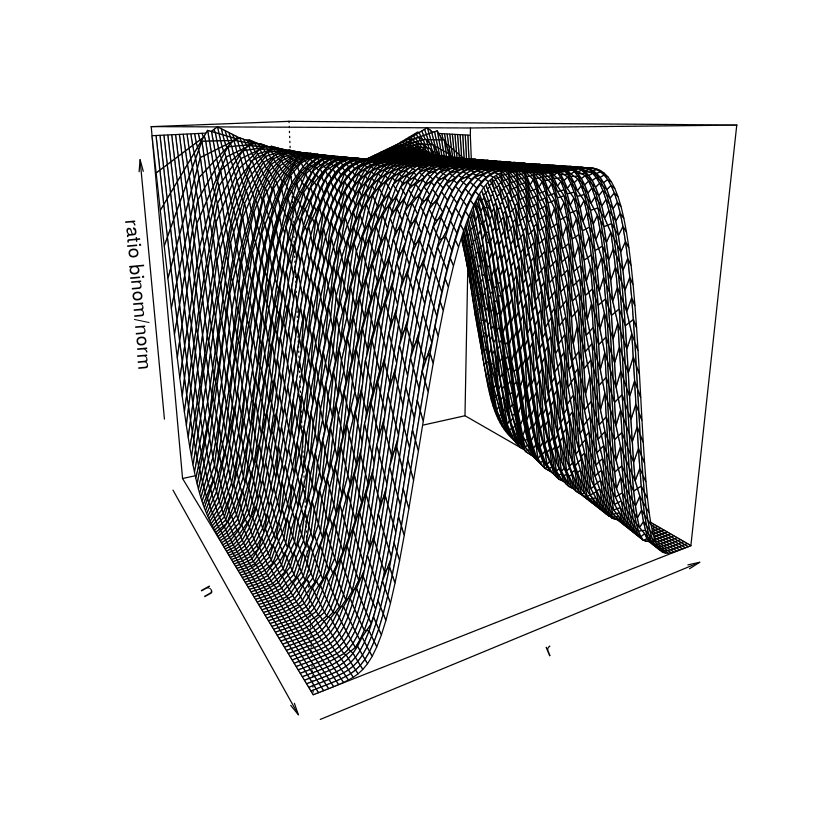

In [243]:
persp(delta.grid.correct, xlab = 'n', ylab = 'r', zlab = 'ratio binom/norm', theta = 60, phi = 15)

## Regular plots

In [41]:
N = 100
p = 0.5

x = seq(0, N)

mu = N * p
sigma = sqrt(N * p * (1 - p))

probs_norm = dnorm(x, mean = mu, sd = sigma)
probs_binom = dbinom(x, N, p)

In [84]:
e = function(probs) {
    return(log(probs / (1 - probs)))
}

In [82]:
delta = e(probs_norm) - e(probs_binom)

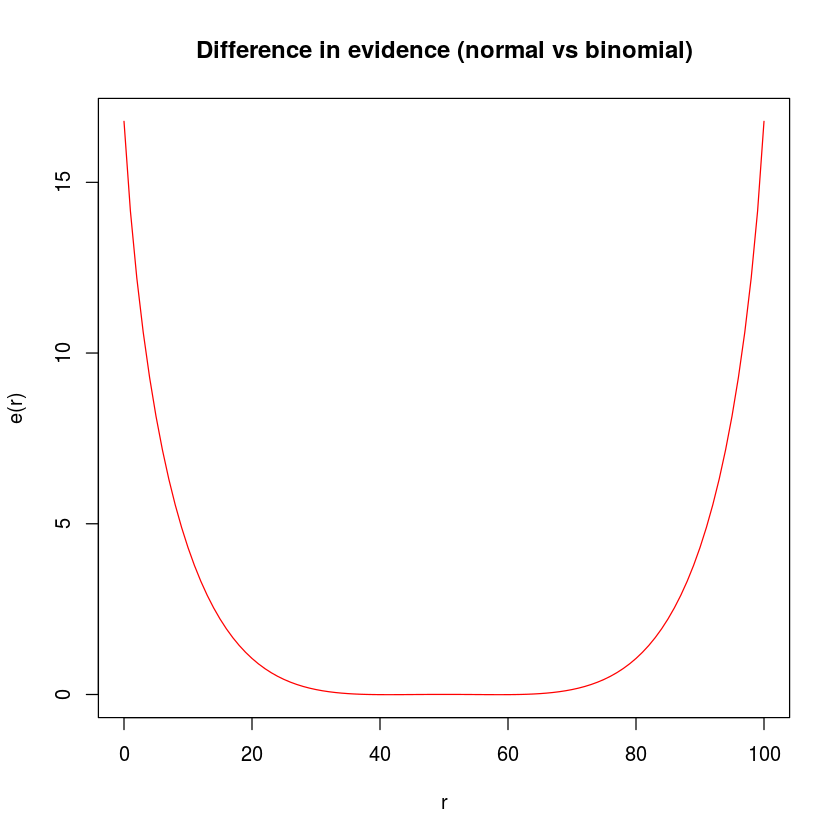

In [83]:
plot(x, delta, type = 'l', col = 'red',
     main = 'Difference in evidence (normal vs binomial)', xlab = 'r', ylab = 'e(r)')

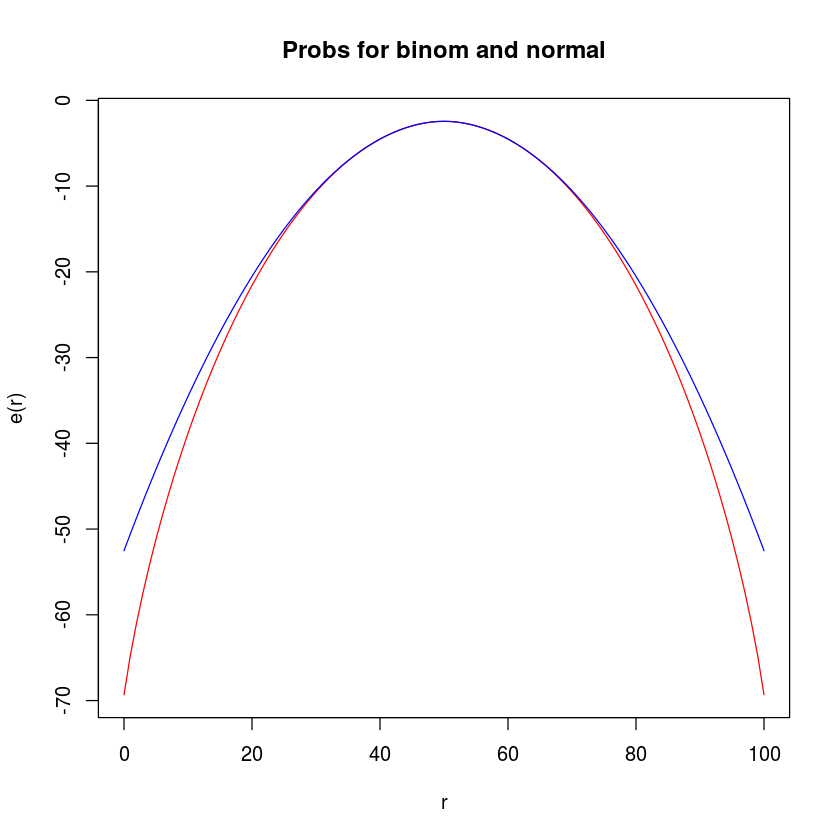

In [76]:
plot(x, e(probs_binom), type = 'l', col = 'red', main = 'Probs for binom and normal', xlab = 'r', ylab = 'e(r)')
lines(x, e(probs_norm), type = 'l', col = 'blue')